In [1]:
import shutil
import matplotlib.pyplot as plt
import numpy as np
import os

import torch
import torchvision
import torchvision.transforms as transforms
from mpl_toolkits.axes_grid1 import ImageGrid

from scikitplot.metrics import confusion_matrix
# import itertools

# import yaml

# import h5py

# import seaborn as sns
# sns.set()
import time

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

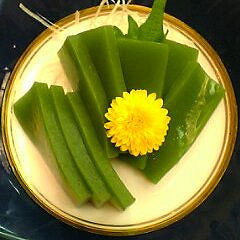

In [3]:
from PIL import Image
im = Image.open('/Users/likithaveluri/Desktop/flowers/dandelion/7355522_b66e5d3078_m.jpg')

display(im)

In [4]:
rootdir= '/Users/likithaveluri/Desktop/flowers' #path of the original folder
new_data_dir = '/Users/likithaveluri/Desktop/split_data'

classes = ['daisy','dandelion','rose','sunflower','tulip']

 # Taking 30% of size as test images and 70% as train images
test_ratio = 0.3
try:
    for i in classes:
        # Creating a new train directory    
    
        train_path = new_data_dir +'/train/' + i
        os.makedirs(train_path)
        # Creating a new test directory
        
        test_path = new_data_dir +'/test/' + i
        os.makedirs(test_path)
    

        source = rootdir + '/' + i
        allFileNames = os.listdir(source)
        
        
        # Shuffling all the file names
        np.random.shuffle(allFileNames)
        
        train_FileNames, test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)* (1 - test_ratio))])

        train_files = []
        test_files = []
        
        for name in train_FileNames.tolist():
            train_files.append(source+'/'+ name)
            
        train_FileNames1 = [source+'/'+name for name in train_FileNames.tolist()]
        test_FileNames1 = [source+'/'+name for name in test_FileNames.tolist()]
        
        print(len(train_files), len(train_FileNames1))
        
        
        #print(train_files)
        
        for name in test_FileNames.tolist():
            test_files.append(source+'/'+ name)
            
        print(len(test_files), len(test_FileNames1))

        
        for name in train_files:
            shutil.copy(name, new_data_dir +'/train/' + i)
        for name in test_files:
            shutil.copy(name, new_data_dir +'/test/' + i)
except Exception as e:
    print(e)


[Errno 17] File exists: '/Users/likithaveluri/Desktop/split_data/train/daisy'


In [5]:
train_dir = '/Users/likithaveluri/Desktop/split_data/train/'
val_dir   = '/Users/likithaveluri/Desktop/split_data/test/'

In [6]:
def data_transform(dir_path,batch_size):
    transform = transforms.Compose([
        transforms.Resize(224), # we'll work with images of size 224 x 224
        transforms.RandomCrop(224, padding=4),
        transforms.RandomRotation(25), # randomly rotate images by 25 degrees
        transforms.RandomHorizontalFlip(), # randomly flip images horizontally
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.8,0.8,0.8],std = [0.4,0.4,0.4]) #normalize images for efficient training
        ])
    
    
    data_v = torchvision.datasets.ImageFolder(root=dir_path,transform=transform)
    data_loader = torch.utils.data.DataLoader(data_v, batch_size=batch_size, shuffle=True,  num_workers=4)
    
    return data_loader

    
batch = 32
batch_size = 8

    


# 
# """programcreek.com/python/example/104834/torchvision.transforms.Resize """



# https://www.programcreek.com/python/example/104834/torchvision.transforms.Resize


In [7]:
train_data_loader = data_transform(train_dir , batch_size)
test_data_loader = data_transform(val_dir ,batch_size)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


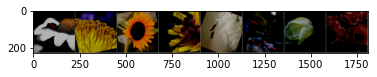

daisy dandelion sunflower dandelion dandelion rose  tulip rose 


In [117]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    #plt.show((out * 255).astype(np.uint8))


# get some random training images
dataiter = iter(train_data_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Network - 3

In [118]:

#re-training
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 18, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(18, 36, 5)
        self.fc1 = nn.Linear(36 * 24 * 24, 120)
        self.fc2 = nn.Linear(120,64)
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32, 5)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool2(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 18, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(18, 36, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=20736, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=5, bias=True)
)

In [119]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.0001,betas=(0.9, 0.999))

In [120]:
from tqdm import tqdm
start_time = int(time.time())
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    i = 0
    for data in tqdm(train_data_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() 

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        i+=1
            
end_time = int(time.time())
print('Finished Training')
fl1_time = end_time-start_time

 53%|█████████████████████▋                   | 200/378 [00:48<00:40,  4.42it/s]

[1,   200] loss: 0.157


 53%|█████████████████████▋                   | 200/378 [00:48<00:40,  4.42it/s]

[2,   200] loss: 0.123


 53%|█████████████████████▋                   | 200/378 [00:49<00:40,  4.36it/s]

[3,   200] loss: 0.114


 53%|█████████████████████▋                   | 200/378 [00:48<00:40,  4.41it/s]

[4,   200] loss: 0.108


 53%|█████████████████████▋                   | 200/378 [00:48<00:40,  4.40it/s]

[5,   200] loss: 0.106


 53%|█████████████████████▋                   | 200/378 [00:49<00:40,  4.36it/s]

[6,   200] loss: 0.103


 53%|█████████████████████▋                   | 200/378 [00:48<00:40,  4.38it/s]

[7,   200] loss: 0.101


 53%|█████████████████████▋                   | 200/378 [00:48<00:40,  4.41it/s]

[8,   200] loss: 0.098


 53%|█████████████████████▋                   | 200/378 [00:49<00:40,  4.39it/s]

[9,   200] loss: 0.098


 53%|█████████████████████▋                   | 200/378 [00:50<00:41,  4.30it/s]

[10,   200] loss: 0.098


 53%|█████████████████████▋                   | 200/378 [00:48<00:41,  4.30it/s]

[11,   200] loss: 0.093


 53%|█████████████████████▋                   | 200/378 [00:49<00:40,  4.39it/s]

[12,   200] loss: 0.097


 53%|█████████████████████▋                   | 200/378 [00:49<00:40,  4.38it/s]

[13,   200] loss: 0.090


 53%|█████████████████████▋                   | 200/378 [01:45<00:40,  4.42it/s]

[14,   200] loss: 0.092


 53%|█████████████████████▋                   | 200/378 [00:48<00:40,  4.44it/s]

[15,   200] loss: 0.091


 53%|█████████████████████▋                   | 200/378 [04:36<00:40,  4.42it/s]

[16,   200] loss: 0.085


 53%|█████████████████████▋                   | 200/378 [00:48<00:40,  4.40it/s]

[17,   200] loss: 0.085


 53%|█████████████████████▋                   | 200/378 [00:48<00:40,  4.38it/s]

[18,   200] loss: 0.086


 53%|█████████████████████▋                   | 200/378 [00:48<00:40,  4.44it/s]

[19,   200] loss: 0.083


 53%|█████████████████████▋                   | 200/378 [00:48<00:41,  4.28it/s]

[20,   200] loss: 0.083


100%|█████████████████████████████████████████| 378/378 [01:50<00:00,  3.42it/s]

Finished Training


In [ ]:
# from tqdm import tqdm
# start_time = int(time.time())
# for epoch in range(20):  # loop over the dataset multiple times

#     running_loss = 0.0
#     i = 0
#     for data in tqdm(train_data_loader):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data[0].to(device), data[1].to(device)

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step() 

#         # print statistics
#         running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 200 mini-batches
#             print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000:2f}')
#             running_loss = 0.0
#         i+=1
            
# end_time = int(time.time())
# print('Finished Training')
# fl1_time = end_time-start_time

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


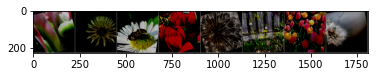

GroundTruth:  tulip dandelion daisy tulip dandelion dandelion tulip dandelion 


In [136]:
dataiter = iter(test_data_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
val = ''
for j in range(8):
    val += classes[labels[j]] + ' '
    
print('GroundTruth: ',val)


In [138]:
outputs = net(images)

In [140]:
_, predicted = torch.max(outputs, 1)

val = ''
for j in range(8):
    val += classes[predicted[j]] + ' '

print('Predicted: ', val)

Predicted:  tulip dandelion daisy tulip dandelion daisy tulip dandelion 


In [167]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs


with torch.no_grad():
    for data in test_data_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(correct,total)
print(f'Accuracy on the test images: {100 * correct // total} %')

876 1298
Accuracy on the test images: 67 %


In [166]:
# def predicted_count(correct1,total1):
#     pass
    

def test_accuracy():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_data_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
#             correct,total = predicted_count(correct,total)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    return correct,total

correct_predicted,total = test_accuracy()


print(f'Accuracy on the test images: {100 * correct_predicted // total} %')

867 1298
Accuracy on the test images: 66 %


In [168]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
def test_prediction(correct_pred,total_pred):
    with torch.no_grad():
        for data in test_data_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1
    return correct_pred , total_pred

correct_pred,total_pred = test_prediction(correct_pred,total_pred)


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for flower: {classname:5s} is {accuracy:.1f} %')

Accuracy for flower: daisy is 63.0 %
Accuracy for flower: dandelion is 87.3 %
Accuracy for flower: rose  is 39.8 %
Accuracy for flower: sunflower is 67.3 %
Accuracy for flower: tulip is 69.6 %
